In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import numpy as np
import warnings
import scipy as scipy
from scipy import optimize
from scipy.optimize import differential_evolution
from tqdm import tqdm
from matplotlib.pyplot import cm
from collections import OrderedDict
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
def gaussian(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [3]:
errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2

In [6]:
hdulist = fits.open('../data/composite_Io_disk.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data
wavelength_list = df_wavelength.values.tolist()

In [536]:
i=53
line = wavelength_list[i]
left_bound = 0.9998*line
right_bound = 1.0002*line
sub_region = (evt_data['WAVELENGTH'] > left_bound) & (evt_data['WAVELENGTH'] < right_bound) #only take values within this area
wl = evt_data['WAVELENGTH'][sub_region]
flux = evt_data['FLUX'][sub_region]
unc = 0.1*flux #placeholder uncertainty
wl = wl.data
flux = flux.data

In [537]:
guess1 = [line, 0.1, 80]

In [541]:
optim = optimize.least_squares(errfunc1, guess1, args=(wl, flux))
                               #bounds=([guess1[0]-0.01, 0, 0],[guess1[0]+0.01, guess1[1]+0.1, guess1[2]+5]))

In [542]:
optim['x'], guess1

(array([1.30297031e+03, 4.28950876e-01, 4.12535676e+01]), [1303.4295, 0.1, 80])

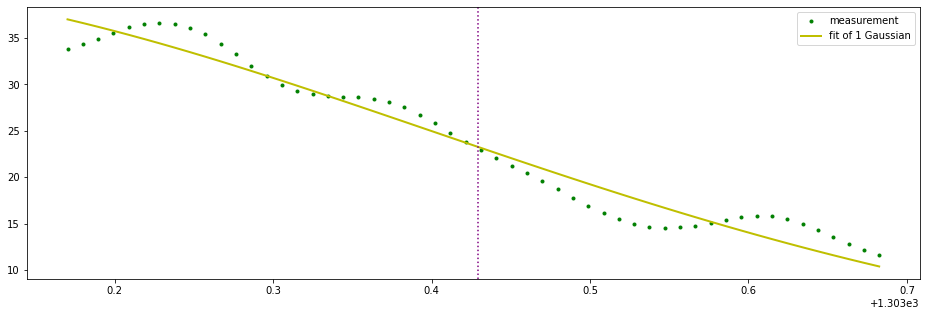

In [543]:
plt.figure(figsize=(16, 5))
plt.plot(wl, flux, 'g.', label='measurement')
plt.plot(wl, gaussian(wl, *optim['x']),
    lw=2, c='y', label='fit of 1 Gaussian')
plt.axvline(x=line, color = 'purple', linestyle = 'dotted')
plt.legend(loc='best')